# Graph and linear algebra

Laurent Cetinsoy

Graph are powerful datastructure that allows to represent various kind of data :

- molecules
- social networks interactions
- complex events / business process

## Graph basics

- Introduction to graphs 1 : https://www.loom.com/share/f3c6986e3ec94c3989822f2bc2ce40e5
- introduction to graphs 2 : https://www.loom.com/share/f57538ad014a4adda5b7e57278d147fa

A graph can be represented by a pair of two sets:

- the sets of nodes (also called vertex). Each node value can be a scalar or a vector
- the sets of edges betweens the node. Edges can also contain data (cf weighted graphs)


In computer science we have several way to represent them.

On simple way would be to have :
- a list of node values where the index represent the node number
- a list of tuple for representing the edges. Each tuple would be (iNodeSource, iNodeTarget) representing the link between two nodes



Let's build a simple graph

Create a list of 3 nodes having the values (-1, 2, 4).

In [ ]:
!pip install networkx

Using a list of tuples, store the edges of the graph so that :
- Node 0 is connected to Node 1
- Node 0 is connected to Node 2

## Basics of networkx


Using list does take us only so far. We can use a graph library named networkx

Install it with pip and import it

With the Graph class create an emptry graph

Recreate the previous graph with the add_node and add_edge methods

Display the number of edge with the .number_of_edges method


Display the number of nodes with the number_of_nodes method

With the draw function of networkx draw your graph

## Directed graph

With the DiGraph class, create a directed graph.

It should have three node :
- Node node 1 is the parent of node 2 and 3
- node 3 is the parent of node 4

Choose any value you want

Display it

## Graph and linear algebra

We can associated several matrices to a given graph, for instance :

- the adjacency matrix
- the degree_matrix
- or the laplacian matrix

What is interesting is that by studying the properties of the matrix we can get insights about the associated graph

Resources :

- https://www.math.utah.edu/~gustafso/s2017/2270/projects-2017/dylanJohnson/Dylan%20Johnson%20Graph%20Theory%20and%20Linear%20Algebra.pdf

- spectral graph theory

### Adjacency matrix

The Adjacency matrix is a n by n matrix storing which node is connected to which otherone.

Let's say that the node of your graph are indexed by (0, 1, 2, .., n)

$ a_{ij} $ value tells if the node $i$ is connected to no $j$. If so $a_{ij} = 1$. Otherwise $a_{ij} = 0$


The following adjacency matrix represent a 3 node graph where node 0 is unconnected. The node 1 is connected to the second one (unordered connexion).

Update the adjacency matrix so that Node 0 is connected to Node 1 (keep the matrix symmetric)

In [ ]:
import numpy as np
A = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]]
)
A

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

Does this graph represent in your opinion a directed graph or an undirected one ?

Create a function named  build_adjacency_matrix(edges: list[tuple]) -> np.array which build a numpy adjacency matrix from a list of edges

Create a graph corresponding to the A adjacency matrix. Test your build_adjacency_matrix on it and check that it works

We can do the same with networkx.

With networkx, create a graph corresponding to the previous adjacency matrix (named A)

Using the adjacency_matrix method from it, get the adjacency matrix. It should retuns what is a sparse matrix.


Convert it to a dense matrix and check that the adjacency matrix is the same as the original one

Draw it with networkx

## Graph convolution

Discrete Convolution can also be defined over graphs. They can be used to build Graph convolutional network which are the equivalent of CNN but for graph data

In the next sections we will implement simple random convolution on a graph.


Code a function neighbors(edges, i_node) which returns a list of node index which are direct neighbors of i_node


Code a function average_neighbors(node_values, edges, i_node) which computes the average of node values which are the direct neighbors of the node i_node

Code a function weighted_average_neighbors(nodes, edges, i_node, weights) which computes a weighted average of the node of values of node i_node.

The problem you may face is that some node will have varying degree. Let say that weights should be an array of size equal to the highest node degree in the graph. (You can use the Degree matrix to get its maximum).

If a node a lower degree, just take the first degree values in weights


code a function graph_convolution(nodes, edges, weights) which computes the convolution over all graph node

The previous function allowed use to create a new set of node features by combining locally each node with its neighbors. This is how Graph convolutional layers will work : A GCN layer will process each nodes but the weights of the convolution will be learnable parameters.

Check pytorch geometric for a deep GCN package for instance


### [Bonus] Node Classification

Now that you have a sense of how GCN work, we will use this architecture to classified nodes of a Graph.  
For this we will use the Cora dataset : https://paperswithcode.com/dataset/cora.

*credits at the end of file*

0. Install Pytorch Geometrics
1. Load the data
2. Show the graph with networkx
3. Perform a node classification

### 0. Install Pytorch and Pytorch Geometrics

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html

### 1. Load the Cora dataset

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
graph = dataset[0]

Processing...
Done!


### 2. Convert dataset graph to networkx graph

<ipython-input-8-04fbc5e1d57a>:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(g.nodes, n_sample)


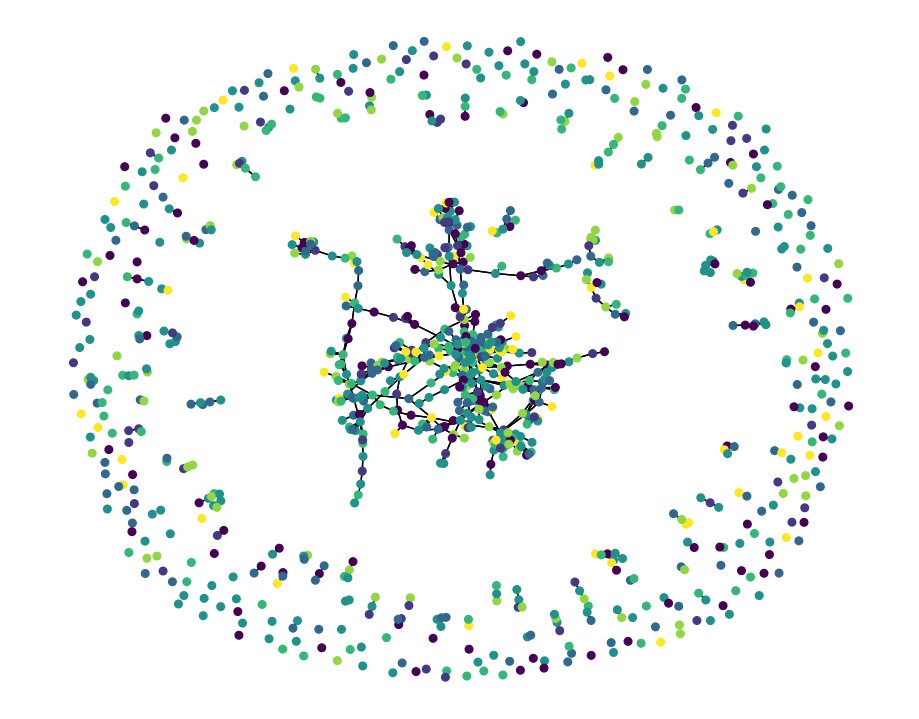

In [ ]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

def convert_to_networkx(graph, n_sample=None):

    g = to_networkx(graph, node_attrs=["x"])
    y = graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        g = g.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return g, y


def plot_graph(g, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(g, node_size=30, arrows=False, node_color=y)
    plt.show()


g, y = convert_to_networkx(graph, n_sample=1000)
plot_graph(g, y)

### 3. Code a MLP network and a GCN and compare accuracy

This tutorial originate from https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275
